In [1]:
# importing the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [6]:
 
from techtrack.inference.preprocessing import capture_video
from techtrack.inference.object_detection import Model
from techtrack.inference.nms import filter as nms_filter


In [ ]:

%matplotlib inline

# Paths to the YOLO files
config_path = '.\yolo_model_1\yolov4-tiny-logistics_size_416_1.cfg'    
weights_path = '.\yolo_model_1\yolov4-tiny-logistics_size_416_1.weights' 
class_names_path = '.\yolo_model_1\logistics.names'   


In [13]:
#Loading and  initializing the model
model = Model(config_path, weights_path, class_names_path)


In [ ]:

# Directory 
image_dir = 'logistics'  
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

#  five images
image_files = image_files[:5]

def display_image_with_bboxes(image, bboxes, class_ids, scores, title):
    for bbox, class_id, score in zip(bboxes, class_ids, scores):
        x, y, w, h = bbox
        label = f"{model.classes[class_id]}: {score:.2f}"
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


Processing image: -01-15-1-1-1-2-26_jpg.rf.eb62a0a5f84fcbdbc0910af072cf0072.jpg


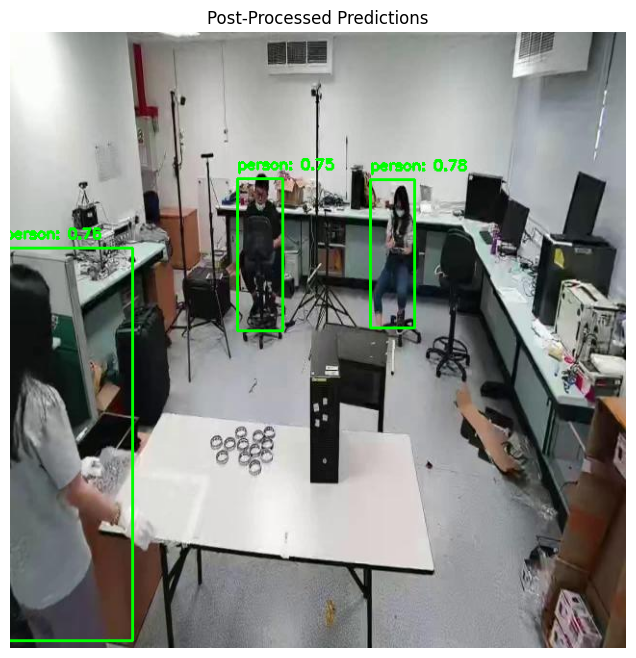

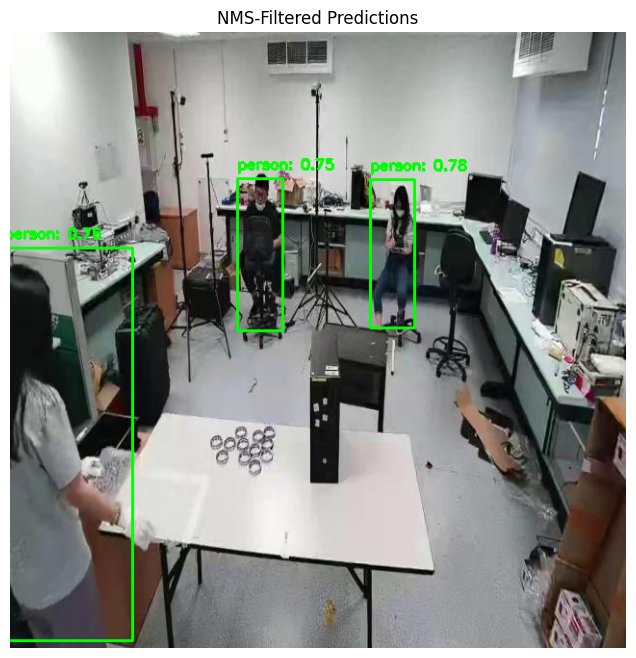



Processing image: -01-15-1-4-1-1-14_jpg.rf.2e89a06faa1c217b95a0e0d7177e8397.jpg


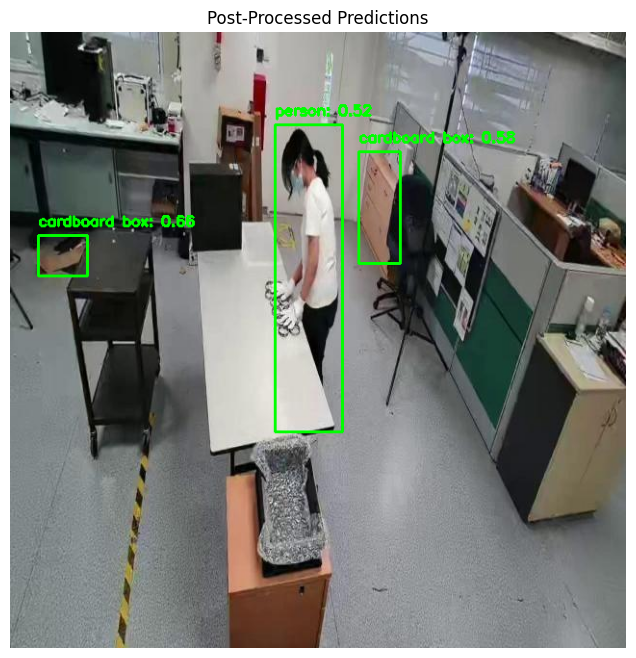

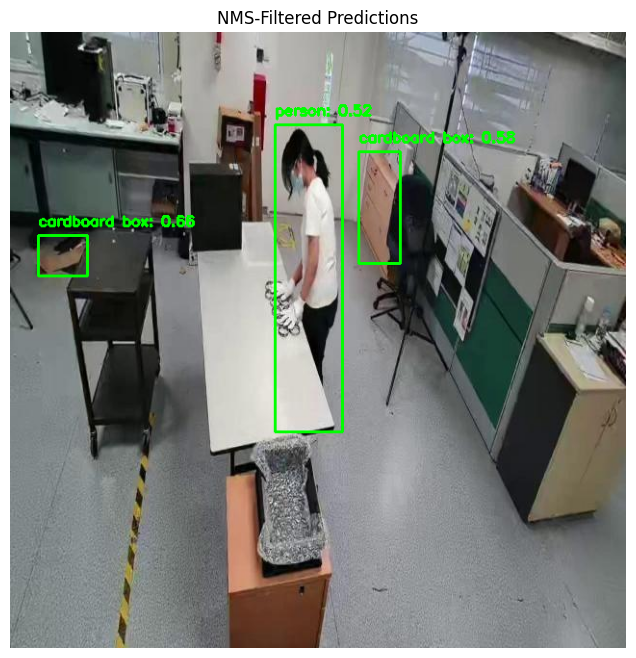



Processing image: -01-15-1-4-1-4-111_jpg.rf.ead3505e4a61d1c97ae2e235b7b228d5.jpg


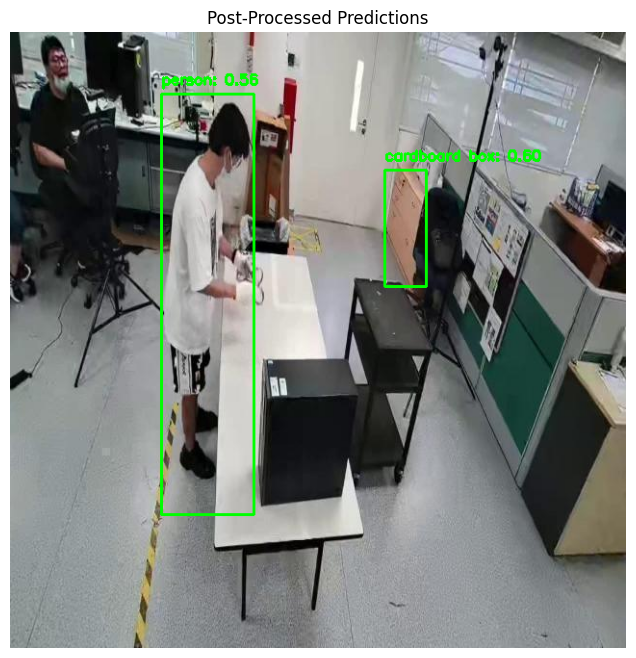

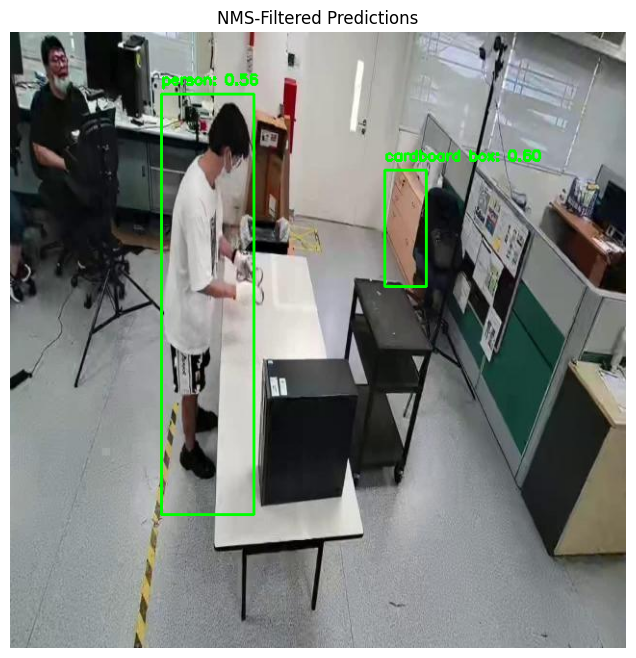



Processing image: -01-15-1-4-1-5-45_jpg.rf.0797388e664e12ff935b062e665f32ac.jpg


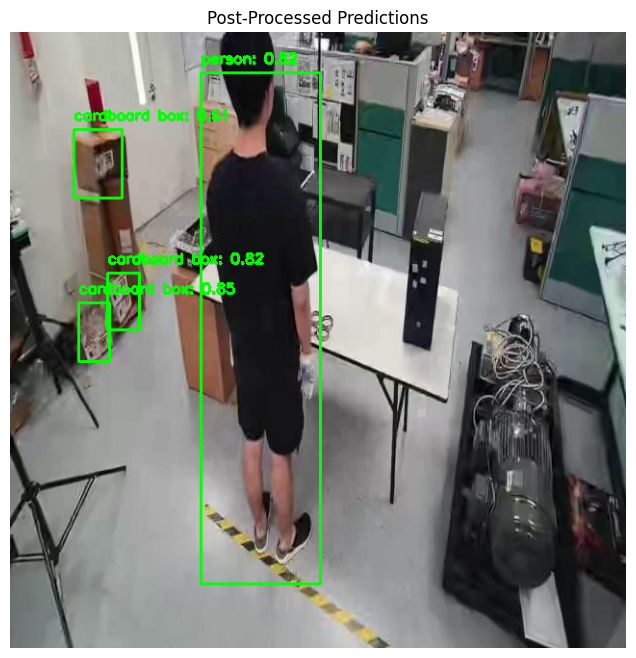

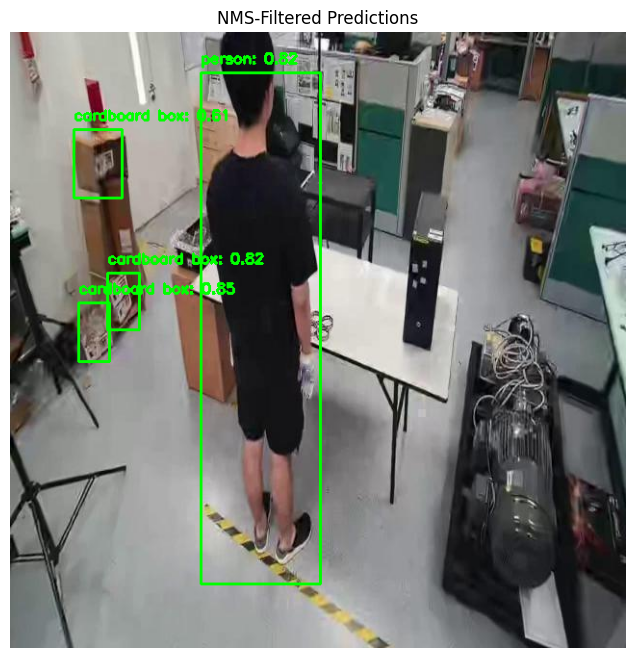



Processing image: -01-15-2-2-2-1-212_jpg.rf.c3706c341a4cbb939c5b1341793bc0d8.jpg


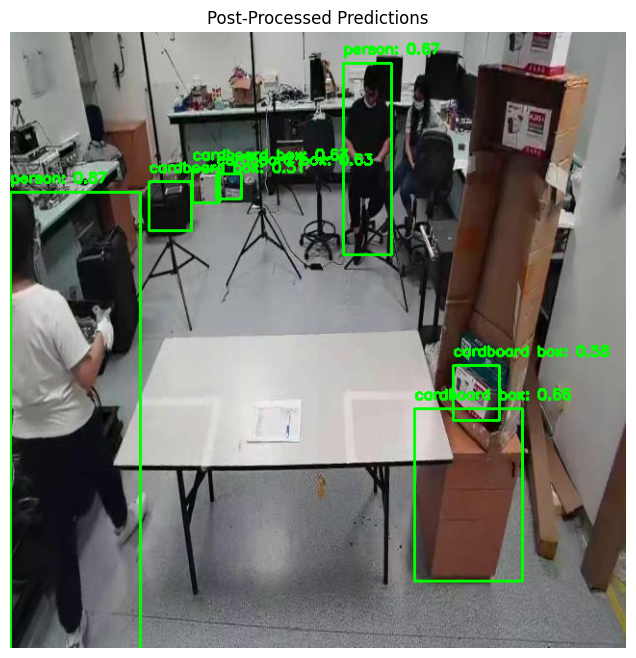

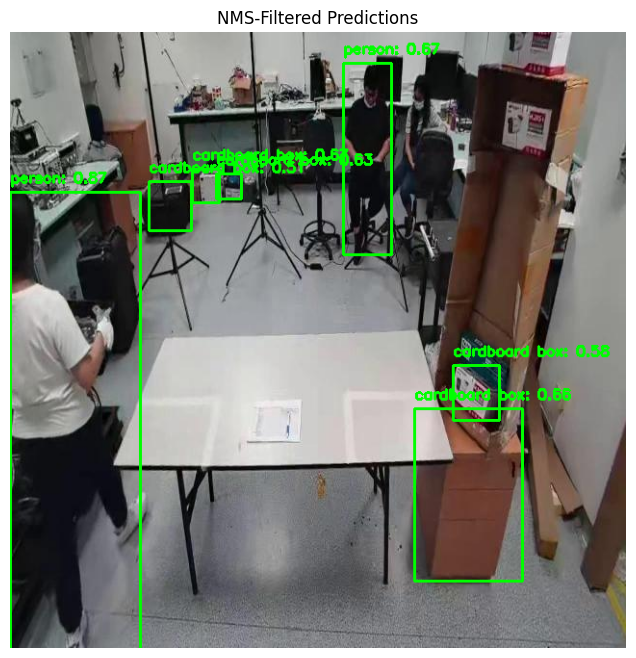

In [ ]:

# process
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    print(f"Processing image: {image_file}")
    
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image {image_file}")
        continue
    
    model.set_frame_shape(image.shape)
    
    # Predict
    predict_output = model.predict(image)
    
   
    
    # Post-process
    score_threshold = 0.5 
    bboxes, class_ids, scores = model.post_process(predict_output, score_threshold)
    
    image_post_process = image.copy()
    display_image_with_bboxes(image_post_process, bboxes, class_ids, scores, title="Post-Processed Predictions")
    
    # NMS
    nms_iou_threshold = 0.4  
    filtered_bboxes, filtered_class_ids, filtered_scores = nms_filter(
        bboxes, class_ids, scores, nms_iou_threshold
    )
    
    image_nms = image.copy()
    display_image_with_bboxes(image_nms, filtered_bboxes, filtered_class_ids, filtered_scores, title="NMS-Filtered Predictions")
    
    print("\n")
